## TP Lineair regression
## Analyse de la base de données “investment data”

In [41]:
## all imports

In [42]:
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
sns.set()
from sklearn import linear_model
import statsmodels.api as sm

from mpl_toolkits.mplot3d import axes3d

## Question 1
## Importer la BDD et afficher les 5 premières lignes

In [43]:
fields = ['year', 'gnp', 'invest', 'cpi', 'interest']
target_url = "https://bitbucket.org/portierf/shared_files/downloads/invest.txt"
df = pd.read_csv(target_url, sep=' ', usecols=fields)
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## Question 2
## Plot des variables GNP Invest

In [44]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Text(0.5, 1.0, 'graph gnp invest')

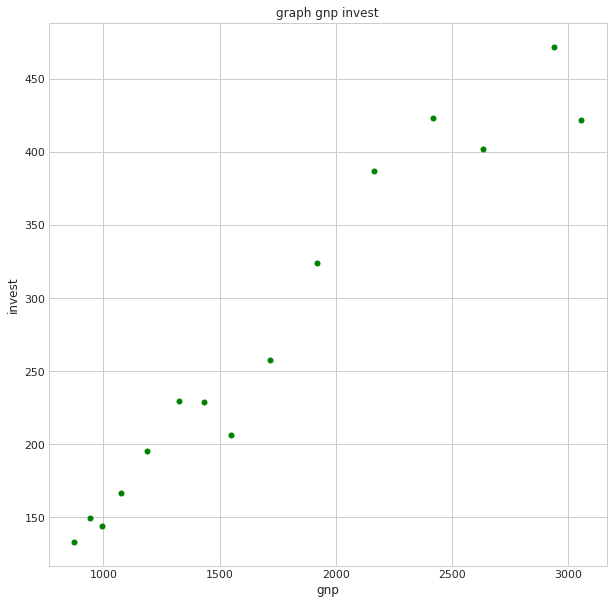

In [45]:
ax, fig = plt.subplots(figsize=(10,10))
plt.plot(df.gnp, df.invest, color='green', marker='o', linestyle=' ',linewidth=0.2, markersize=5)
plt.xlabel("gnp")
plt.ylabel("invest")
plt.title("graph gnp invest")


## convertir les valeurs de GNP et Invest en échelle logarithmique

In [46]:
df['gnp'] = np.log(df['gnp'])
df['invest'] = np.log(df['invest'])
df.head()

,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50


## Question 3 
## Calcul de l'intercep B0, la pente B1, leurs écart-types et le coefficient de détermination

In [47]:
X = df['gnp']
Y = df['invest']
X_bar = np.mean(X)
Y_bar = np.mean(Y)

B1 = sum(( X - X_bar) * (Y - Y_bar)) / sum ((X - X_bar) ** 2) # voir exo 
B0 = Y_bar - B1 * X_bar                 # voir exo

print ("intercept " + str(B0))  # coaf 0
print ("pente " + str(B1))      # coef 1

intercept -1.9635913352301833
pente 1.015281401598871


In [48]:
Y_hat = B0 + (B1 * X)
n = df['invest'].count()

sigma_chap_2 = 1/(n-2) * sum((Y - Y_hat)**2) # variance empirical pow 2
print(sigma_chap_2)

0.0076763385554603995


In [49]:
SD_0 = np.sqrt(sigma_chap_2 * (1/n + (X_bar ** 2 / sum ( (X - X_bar) ** 2 ) ))) # Standar error
SD_1 = np.sqrt(sigma_chap_2 / sum((X - X_bar) ** 2)) # standar error of coef 1
print ("standar error 0 " + str(SD_0))
print ("standar error b1 " +str(SD_1))

# en utilisant la lib de numpy (section 1.4 du poly) formule 1.3
coef_det = 1 - (np.linalg.norm(Y_hat - Y) ** 2 / np.linalg.norm(Y - Y_bar) ** 2) # risque quadratique
print ("Risque squad = " + str(coef_det) )

standar error 0 0.4095472716623082
standar error b1 0.055383060354852805
Risque squad = 0.9627572956057855


## Fonctions cipi/ quantile
J'ai créer une fonction cipi qui utilise les formules matriciells pour pouvoir la réutiliser plus tard dans la partie 2 du TP 

In [50]:
#### Calcul of quantil with alpha IC level and k degree of freedom
def quantile(alpha, k):
    return t.ppf(1 - alpha/2, k)

#### calcul OF integral confidence and Integral Prediction ###
# alpha : IC level
# mat_X matrix of our data frame (Input)
# xi matrix of prediction  (output)
# sigma_hat variance empirical of residual
# betha_vect vector of estimators
######################################

def cipi(alpha, mat_x, xi, sigma_hat, betha_vect):
    rank = np.linalg.matrix_rank(mat_x) # rank of matrix
    n = mat_x.shape[0] # nombre de lignes
    q = quantile(alpha, n-rank)  # quantil
    
    xi_t = np.transpose(xi) # we need transpose matrix of prediction

    ###### CI formule du poly
    G = np.dot(np.transpose(mat_x), mat_x ) #  (XtX) GRAM

    V = np.dot(np.dot(np.linalg.inv(G), xi_t), xi) # Inverse G
    
    ci_right = q  * sigma_hat * np.sqrt(V)
    y_hat = np.dot(xi_t, betha_vect)
    
    CIinf = y_hat - ci_right
    CIsup = y_hat + ci_right
    
    ###### PI formule du poly

    pi_right = q  * sigma_hat * np.sqrt(V+1)
    
    PIinf = y_hat - pi_right
    PIsup = y_hat + pi_right
    
    return ([CIinf, CIsup, PIinf, PIsup])


## Question 4
## Statistique de B1

In [51]:
 #voir le tableau de student
q = quantile(0.1, n - 2)

t_test =  B1 / SD_1 # voir la formule

if (t_test > q):
    print ("on rejete car t test = " + str(t_test) + " > " + str(q))
else :
    print ("on prends t test = "+ str(t_test) + " < " + str(q))

    
p_val =  (1 - t.cdf(np.abs(t_test), n-2)) * 2  # P-value
print ("P value = " + str(p_val))

on rejete car t test = 18.33198445686668 > 1.7709333959867988
P value = 1.1363709973011282e-10


## Question 5
## prédir Invest pour GNP = log(1000) et calculer le CI PI

In [52]:
## on log value
x_to_pred = np.log(1000)
predect = B1 * x_to_pred + B0
print("predection for gnp = 1000 " + str(predect))

predection for gnp = 1000 5.0497241263168


## CI and PI 

In [53]:
mat_1x = np.ones((n, 2)) # vect 1
mat_1x[:, 1] = X # add matrix X

x_new = np.array([1, np.log(1000)])
betha_vect = np.array([B0, B1])

cipi_1000 = cipi(0.1, mat_1x, x_new, np.sqrt(sigma_chap_2), betha_vect)
print(cipi_1000)

[4.988222845971106, 5.111225406662494, 4.882820023438678, 5.216628229194922]


## Q6 Q8
## Plot des variables GNP Invest, leur droite de regression ainsi que les intervalles CI PI, 
## La valeur predite sont CI et son PI

<IPython.core.display.Javascript object>


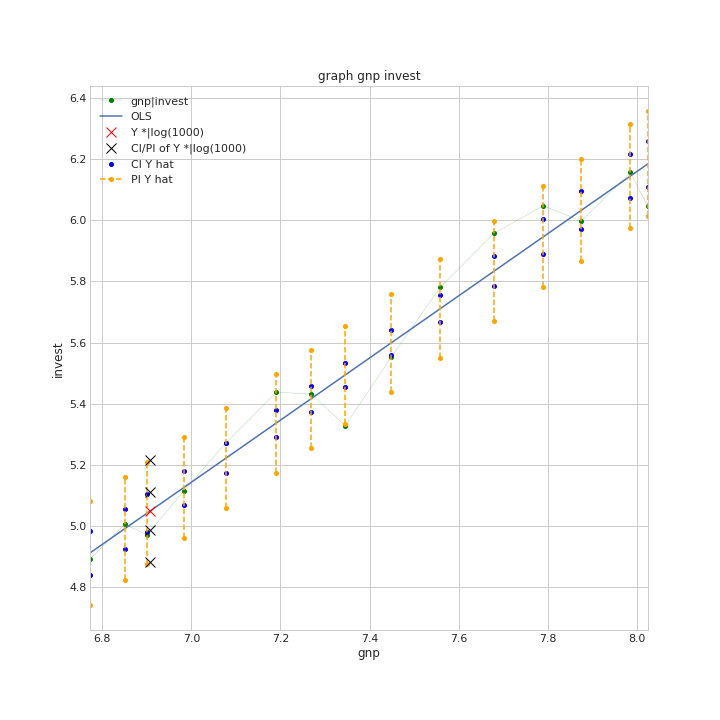

In [69]:
ax, fig = plt.subplots(figsize=(10,10))
plt.plot(df.gnp, df.invest, color='green', marker='o', linestyle='--',linewidth=0.2, markersize=4, label="gnp|invest")
plt.xlabel("gnp")
plt.ylabel("invest")
plt.title("graph gnp invest")
plt.xlim([df.gnp.min(), df.gnp.max()])

vectPred = B1 * X + B0 # Y_hat vect
plt.plot(X, vectPred, label="OLS")

for x_hat_row in mat_1x:
    cipi_row = cipi(0.1, mat_1x, x_hat_row, np.sqrt(sigma_chap_2), betha_vect)
    ciplt, = plt.plot([x_hat_row[1]]*2, cipi_row[:2], color="blue", marker='o', linestyle=' ', markersize=4)    #CI
    piplt, = plt.plot([x_hat_row[1]]*2, cipi_row[2:], color="orange", marker='o',linestyle='--',  markersize=4) #PI

# ci pi x=log 1000
plt.plot(x_to_pred, predect, color="red", marker='x', linestyle=' ', markersize=10, 
         label="Y *|log(1000)") 
plt.plot([x_to_pred]*4, cipi_1000, color="black", marker='x', linestyle=' ', markersize=10, 
         label="CI/PI of Y *|log(1000)")

handles, labels = fig.get_legend_handles_labels()
handles += [ciplt, piplt]
labels += ["CI Y hat", "PI Y hat"]
fig.legend(handles, labels)

plt.show()

## Question 7 vérifier les valeurs trouvées avec les lib existante statsmodels/sklearn 

In [55]:
lm = linear_model.LinearRegression()
lm.fit(X[:, np.newaxis], Y) # fit data

print ("intercept : " + str(lm.intercept_))
print ("coeffetients : " + str(lm.coef_[0]))
print ("score : " + str(lm.score(X[:, np.newaxis], Y)))
print ("predection for gnp = 1000 : " + str(lm.predict(np.array([np.log(1000)]).reshape(-1, 1))))

intercept : -1.9635913352301815
coeffetients : 1.015281401598871
score : 0.9627572956057855
predection for gnp = 1000 : [5.04972413]


## PARTIE 2 DU TP

##  Question 10
J'ai créer une fonction stat qui fais tout les calculs (Coefficients, ecartypes, coefficients de détermination) et bien afficher le résultat

In [56]:
############################
# dfIn Matrix de input
# Y Vecteur de la variable à predir 
# output les stats
###########################

def stats(dfIn,Y):
    X= np.array(dfIn) # create ab array with data frame

    n = X.shape[0]     
    vect_1 = np.ones((n, 1)) # vect 1

    mat_1X = np.hstack([vect_1, X]) # create matrix 1 X   
    mat_1X_transpose = mat_1X.transpose()

    
    #### generate vect of coefetient 
    A = np.linalg.inv(np.dot(mat_1X_transpose, mat_1X))
    B = np.dot(mat_1X_transpose, Y)
    newBetha = np.dot(A, B) # coefficients
    
    Y_hat =0
    for i in range(len(newBetha)) :
        Y_hat += newBetha[i] * mat_1X[:,i]
    
    CD = 1 - (np.linalg.norm(Y_hat - Y) ** 2/ np.linalg.norm(Y - np.mean(Y)) ** 2) 
    
    rank = np.linalg.matrix_rank(mat_1X) # rank of X
    
    sigma_hat = np.sqrt(1/(n-rank)) * (np.linalg.norm(Y - Y_hat)) # variance empirical
    X_bar = np.mean(mat_1X, axis=0)
    
    q = quantile(0.1, n-rank)
    
    dictToPrint = {}
    
    for i in range(len(newBetha)) :
        SE = sigma_hat * np.sqrt(np.linalg.inv(np.dot(mat_1X_transpose, mat_1X))[i,i]) #standart error
        
        t_test =  newBetha[i] / SE 
        
        p_value =  (1 - t.cdf(np.abs(t_test), n-rank)) * 2
        
    ####################### Affichage des résultats ##########################################
        if i==0 :
            dictToPrint["const"] = [newBetha[i], SE, t_test, p_value]
        else:
            dictToPrint[dfIn.columns.values[i-1]] = [newBetha[i], SE, t_test, p_value]
    
    print ("\t\t OLS REGRESSION RESULTS \n" + 
          "============================================================================\n" +
          "variable: \t " + Y.name  + "\t\t\t R-squared: \t "+ str(round(CD,4)) + 
           "\n ======================================================================= \n" +
           "\t\tcoef \t STD \t\t t-test \t\t P-val \n" +
           "---------------------------------------------------------------------------\n"
         )
    
    for k in iter(dictToPrint):
        c, se, tt, pval = dictToPrint[k]
        print ("{:<13} {:<10} {:<15} {:<23} {:<28}".format(k, round(c,4), round(se,4), round(tt,4), round(pval,5)))
    
    
    print("\n----------------------------------------------------------------------------\n")
    
    
    return newBetha, sigma_hat, Y_hat

In [57]:
dfIn = df[["gnp", "interest"]]
newBetha, sigma, Y_hat = stats(dfIn, Y)

		 OLS REGRESSION RESULTS 
variable: 	 invest			 R-squared: 	 0.9633
		coef 	 STD 		 t-test 		 P-val 
---------------------------------------------------------------------------

const         -2.1805    0.6624          -3.2918                 0.00644                     
gnp           1.0512     0.1021          10.3001                 0.0                         
interest      -0.0065    0.0153          -0.4255                 0.67801                     

----------------------------------------------------------------------------



## Question 9 et 11
La matrice GRAM de Q9 est calculer dans la fonction cipi, 
la prediction et CI, PI de Q11 

In [58]:
XY= np.array(dfIn) # create ab array with data frame
mat_1X = np.hstack([np.ones((XY.shape[0], 1)), XY])


print ("for valus:")
xi = [np.log(1000), np.log(10)]
z_hat =newBetha[0]
for i in range(len(xi)) :
    z_hat += newBetha[i+1] * xi[i]

    print (dfIn.columns.values[i] + ":\t " + str(xi[i]))

print("predection:\t" + str(z_hat) + "\n")
xpred = np.array([1]+xi)
z_cipi = cipi(0.01, mat_1X, xpred, sigma, newBetha) # voir la fonction en haut

print("CI inf \t CI sup \t PI inf \t PI sup")
print ("{:<8} {:<15} {:<15} {:<23}"
       .format(round(z_cipi[0], 4), round(z_cipi[1], 4), round(z_cipi[2], 4), round(z_cipi[3], 4))
      )

for valus:
gnp:	 6.907755278982137
interest:	 2.302585092994046
predection:	5.066239224150311

CI inf 	 CI sup 	 PI inf 	 PI sup
4.9048   5.2277          4.7461          5.3864                 


## Question 12
## Plot en 3D 
il manque les CI PI 

<IPython.core.display.Javascript object>


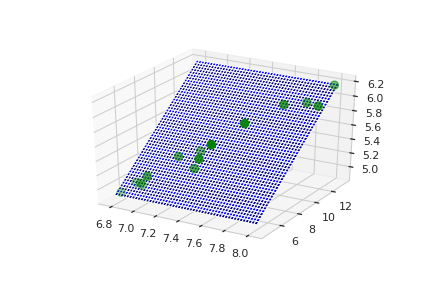

In [66]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(df["gnp"],df["interest"],df["invest"], color='green',marker='o',s= 70, label="fig 3D")

x_range = np.linspace(min(df["gnp"]),max(df["gnp"])).reshape(-1,1)
z_range = np.linspace(min(df["interest"]),max(df["interest"])).reshape(-1,1)
y_range = np.linspace(min(Y_hat),max(Y_hat)).reshape(-1,1)

uu, yy = np.meshgrid(y_range,y_range)
xx, zz = np.meshgrid(x_range,z_range)

ax.plot_surface(xx, zz, yy, color='blue', label="OLS")

plt.show()

## Question 13 Vérifier avec les lib existantes

In [60]:
lm = linear_model.LinearRegression()
lm.fit(df[["gnp", "interest"]], Y) # fit data

print ("intercept : " + str(lm.intercept_))
print ("coeffetients : " + str(lm.coef_))
print ("score : " + str(lm.score(df[["gnp", "interest"]], Y)))
print ("predection : " + str(lm.predict(np.array([np.log(1000), np.log(10)]).reshape(1, -1))))

intercept : -2.1804547259114004
coeffetients : [ 1.05124269 -0.00652888]
score : 0.9633108306726245
predection : [5.06623922]


## OPTIONAL 
appliquer la fonction stats sur les Q(3-6)

In [67]:
dfIn1D = df[["gnp"]]

newBetha1D, sigma1D, Y_hat1D = stats(dfIn1D, Y)

print ("for valus:")
xi = [np.log(1000)]
z_hat =newBetha[0]
for i in range(len(xi)) :
    z_hat += newBetha[i+1] * xi[i]

    print (dfIn.columns.values[i] + ":\t " + str(xi[i]))

print("predection:\t" + str(z_hat) + "\n")

		 OLS REGRESSION RESULTS 
variable: 	 invest			 R-squared: 	 0.9628
		coef 	 STD 		 t-test 		 P-val 
---------------------------------------------------------------------------

const         -1.9636    0.4095          -4.7945                 0.00035                     
gnp           1.0153     0.0554          18.332                  0.0                         

----------------------------------------------------------------------------

for valus:
gnp:	 6.907755278982137
predection:	5.081272524544821

